In [1]:
import pandas as pd
from pyproj import Proj, transform
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib.parse
df_food = pd.read_csv("active_food_est_licenses.csv")
df_food.index.title = "Food Licenses"
df_liquor = pd.read_csv("liquor_licenses.csv")
df_liquor.index.title = "Liquor Licenses"
df_cannabis = pd.read_csv("Cannabis_Registry.csv")
df_cannabis.index.title = "Cannabis Licenses"
df_licensing = pd.read_csv("licensing_board.csv")
df_licensing.index.title = "General Licenses"

In [2]:
df_food = df_food.drop(['LICSTATUS'], axis = 1)
fulladdr = []
for i in list(zip(df_food['Address'], df_food['CITY'], df_food['State'], df_food['ZIP'])):
    fulladdr.append(f"{i[0]}, {i[1]}, {i[2]}, {i[3]}")
df_food['fulladdress'] = fulladdr
df_food

,BusinessName,DBAName,Address,CITY,State,ZIP,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude,fulladdress
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.157410,"225 Grove, West Roxbury, MA, 02132"
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.056130,"100 Federal, Boston, MA, 02110"
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.113860,"656 Centre, Jamaica Plain, MA, 02130"
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.072910,"200 Berkeley, Boston, MA, 02116"
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.000000,"25 Jan Karski, Dorchester, MA, 02125"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,ZESTO'S PIZZA,NaN,460 Centre,Jamaica Plain,MA,02130,FT,Eating & Drinking w/ Take Out,2011-04-28 08:54:10,16175242004,28061.0,42.319350,-71.111540,"460 Centre, Jamaica Plain, MA, 02130"
3027,Ziggy's,NaN,583 Washington,Brighton,MA,02135,FT,Eating & Drinking w/ Take Out,2020-10-23 12:17:07,16178333508,351055.0,0.000000,0.000000,"583 Washington, Brighton, MA, 02135"
3028,Zo,NaN,92 State,Boston,MA,02109,FT,Eating & Drinking w/ Take Out,2011-12-16 09:44:46,16179016017,170003.0,42.359232,-71.055320,"92 State, Boston, MA, 02109"
3029,Zuma Restaurant,NaN,1 Dalton,Boston,MA,02115,FS,Eating & Drinking,2018-02-16 10:18:58,18574492500,351070.0,0.000000,0.000000,"1 Dalton, Boston, MA, 02115"


In [3]:
fulladdr = []
for i in list(zip(df_liquor['address'], df_liquor['city'], df_liquor['state'], df_liquor['zip'])):
    fulladdr.append(f"{i[0]}, {i[1]}, {i[2]}, {i[3]}")
df_liquor['fulladdress'] = fulladdr

#def getcoords(address):
#    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
#    response = requests.get(url).json()
#    if response:
#        return (float(response[0]["lon"]), float(response[0]["lat"]))

#inProj = Proj(init='epsg:2249', preserve_units = True)
#outProj = Proj(init='epsg:4326')

#bruh = []
#for i in df_liquor[['gpsx', 'gpsy', 'fulladdress']].values:
#    value = transform(inProj,outProj, i[0], i[1])
#    if np.isnan(value[0]) or np.isnan(value[1]):
#        tempval = getcoords(i[2])
#        if tempval:
#            value = tempval
#    bruh.append(value)
    
#bruh = list(zip(*bruh))

#df_liquor['Latitude'] = bruh[1]
#df_liquor['Longitude'] = bruh[0]

df_liquor = df_liquor.drop(['gpsx', 'gpsy'], axis = 1)
df_liquor

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,capacity,applicant,manager,day_phone,evening_phone,address,city,state,zip,fulladdress
0,LB-485386,NaN,Active,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,Accessory retail sales of wine & malt beverage...,...,0.0,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125,"951- Dorchester AV, Dorchester, MA, 02125"
1,LB-481088,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,"1,000SF: in one room on first floor (seating f...",...,32.0,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135,"559- Washington ST, Brighton, MA, 02135"
2,LB-476655,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-26,2022-12-31,HOMESTEAD BAKERY & CAFE LLC,NaN,NaN,homestead bakery & cafe LLC is located on the ...,...,0.0,homestead bakery & cafe LLC,Annie Le,(617)858-0468,NaN,1448- Dorchester AVE,Dorchester,MA,02122,"1448- Dorchester AVE, Dorchester, MA, 02122"
3,LB-445763,NaN,Active,Retail Malt Wine,2022-08-30,2022-12-31,Grove Hall Foods Corp.,Grove Hall Convenience Market II,NaN,NaN,...,0.0,Grove Hall Foods Corp.,Edward Guerrero,(617)708-0775,NaN,292- Talbot AVE,Boston,MA,02124,"292- Talbot AVE, Boston, MA, 02124"
4,LB-469486,NaN,Active,Retail Malt Wine,2022-08-24,2022-12-31,Rupal Corporation,J&J Discount Mini Mart,No singles,Premise is located at 131 West Broadway South ...,...,0.0,Rupal Corporation,Michael David Gannon,(617)268-0455,NaN,131- W Broadway,South Boston,MA,02127,"131- W Broadway , South Boston, MA, 02127"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,LB-101595,GOPWM0001,Active,GOP Malt Wine,2013-10-01,2022-12-31,LYRIC STAGE COMPANY,LYRIC STAGE,11 00 M to P,140 CLARENDON STREET; ON THE SECOND FLOOR THEA...,...,244.0,LYRIC STAGE COMPANY,Matt Chapuran,NaN,776-8280,140- Clarendon ST,Boston,MA,02116,"140- Clarendon ST, Boston, MA, 02116"
1442,LB-101596,GOPWM0004,Active,GOP Malt Wine Liq.,2013-10-01,2022-12-31,"BOSTON CULINARY GROUP, INC.",THE ORPHEUM THEATRE,1 CONSUMPTION ALCOHOL ALLOWED IN SEATING AREA ...,"IN WHOLE OF ORPHEUM THEATRE, INCLUDING BAR SER...",...,2763.0,"BOSTON CULINARY GROUP, INC.",Sean O'Dwyer,NaN,(781)659-9923,1- Hamilton Pl,Boston,MA,02108,"1- Hamilton Pl, Boston, MA, 02108"
1443,LB-101611,GOPWML0009,Active,GOP Malt Wine Liq.,2013-10-01,2022-12-31,"EMANUEL ENTERPRISES, LLC",NaN,NaN,Entrance on first floor; one room on first fl...,...,49.0,"EMANUEL ENTERPRISES, LLC",EDGAR OSPINA,NaN,(617)608-0899,71-73 Meridian ST,East Boston,MA,02128,"71-73 Meridian ST, East Boston, MA, 02128"
1444,LB-98819,CLBALA0002,Active,Clb. All Alc. Airport,2013-10-01,2022-12-31,"AMERICAN AIRLINES, INC.",ADMIRALS CLUB,NaN,"Approximately 15,317 Sq. Ft. retail space with...",...,280.0,"AMERICAN AIRLINES, INC.",Susan Namdar,NaN,(781)944-1506,"Logan Airport, Terminal B",East Boston,MA,02128,"Logan Airport, Terminal B , East Boston..."


In [4]:
addr = df_cannabis['Facility_Address'].map(lambda x: x.split(","))
street = addr.map(lambda x: x[0].replace("\n", " ").strip())
city = addr.map(lambda x: x[-2].strip())
state = addr.map(lambda x: 'MA')
zipcode = addr.map(lambda x: x[-1][-5:] if len(x[-1]) > 5 else np.nan)
df_cannabis['street'] = street
df_cannabis['city'] = city
df_cannabis['state'] = state
df_cannabis['zip'] = zipcode

x_copy = df_cannabis['x']
df_cannabis['x'] = df_cannabis['y']
df_cannabis['y'] = x_copy

In [5]:
inProj = Proj(init='epsg:2249', preserve_units = True)
outProj = Proj(init='epsg:4326')

#bruh = []
#for i in df_licensing[['gpsx', 'gpsy']].values:
#    bruh.append(transform(inProj,outProj, i[0], i[1]))

#bruh = list(zip(*bruh))

#df_licensing['Latitude'] = bruh[1]
#df_licensing['Longitude'] = bruh[0]

df_licensing = df_licensing.drop(['gpsx', 'gpsy'], axis = 1)

df_licensing

/Users/software/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/software/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,patronsout,capacity,applicant,manager,day_phone,evening_phone,address,city,state,zip
0,LB-485386,NaN,Active,Misc,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,...,NaN,0.0,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125
1,LB-481806,NaN,Active,CV,Common Victualler,2022-10-13,2022-12-31,"Food's Style USA, Inc.",Hokkaido Ramen Santouka,NaN,...,11:30 PM,32.0,"Food's Style USA, Inc.",Tatsunori Tanaka,(206)889-2069,NaN,169- Brighton AVE,Allston,MA,02134
2,LB-492447,NaN,Active,CV,Common Victualler,2022-10-03,2022-12-31,Tori EB Food Inc.,Tori Japan,NaN,...,10:30 PM,12.0,Tori EB Food Inc.,Min Zhu,(781)609-8753,NaN,62- William C Kelly SQ,East Boston,MA,02128
3,LB-481088,NaN,Active,CV,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,...,11:30 PM,32.0,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135
4,LB-423922,NaN,Active,CV,Common Victualler,2022-09-28,2022-12-31,"PNR, LLC",PICK N' ROLL SUSHI,Hours Operation Monday Saturday 11 00 AM 8 PM,...,8:30 PM,28.0,"PNR, LLC",Victor Choi,(617)251-5829,NaN,134- Boylston ST,Boston,MA,02116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,LB-107538,NaN,Active,Misc,Dormitory,2013-09-16,2023-04-30,TRUSTEES OF BOSTON UNIVERSITY,BOSTON UNIVERSITY,No Conditions,...,NaN,0.0,Trustees of Boston University,NISHMIN KASHYAP,(617)353-2148,(617)353-2148,826- Beacon ST,Boston,MA,02215
3325,LB-107590,NaN,Active,Misc,Dormitory,2013-09-16,2023-04-30,TRUSTEES OF BOSTON UNIVERSITY,BOSTON UNIVERSITY,No Conditions,...,NaN,0.0,Trustees of Boston University,NISHMIN KASHYAP,(617)353-2148,(617)353-2148,844-844A Beacon ST,Boston,MA,02215
3326,LB-108942,NaN,Active,CV,Common Victualler,2013-09-04,2022-12-31,"WHOLE FOODS MARKET GROUP, INC.",Whole Foods Market,NaN,...,10:30 PM,40.0,"Whole Foodsmarket Group, Inc.",Dorothy Pumphrey,(617)492-5500,NaN,27- Austin St,Charlestown,MA,02129
3327,LB-109265,NaN,Active,CV,Common Victualler,2013-08-30,2022-12-31,"Sultana's Bakery & Cafe, LLC","Boston Croissant Bakery, Cafe",1 7 00 AM PM Mon Sat 9 6 on Sundays,...,7:30 PM,4.0,"Sultana's Bakery & Cafe, LLC",Lale Dogar,(617)202-5454,NaN,1585- Commonwealth AVE,Brighton,MA,02135


In [10]:
#licenseMap = folium.Map(location = [42.361145, -71.057083], zoom_start=11)
#for i in list(zip(df_food['Latitude'], df_food['Longitude'])):
#    if not (np.isnan(i[0]) or np.isnan(i[1])):
#        folium.CircleMarker(location = [i[0], i[1]], radius=5, color='blue').add_to(licenseMap)
#for i in list(zip(df_liquor['Latitude'], df_liquor['Longitude'])):
#    if not (np.isnan(i[0]) or np.isnan(i[1])):
#        folium.CircleMarker(location = [i[0], i[1]], radius=8, color='yellow').add_to(licenseMap)
#for i in list(zip(df_cannabis['x'], df_cannabis['y'])):
#    if not (np.isnan(i[0]) or np.isnan(i[1])):
#        folium.CircleMarker(location = [i[0], i[1]], radius=10, color='lime').add_to(licenseMap)
#for i in list(zip(df_licensing['Latitude'], df_licensing['Longitude'])):
#    if not (np.isnan(i[0]) or np.isnan(i[1])):
#        folium.CircleMarker(location = [i[0], i[1]], radius=1, color='red').add_to(licenseMap)
#licenseMap.save('map.html')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
 
def list(df,label):
    df[label] = df[label].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))
    uniquevals = df[label].value_counts()
    size=uniquevals.values.tolist()
    label=uniquevals.keys().tolist()
    sizes=[1686, 238]
    labels=['boston', 'dorchester']
    
    print(size)
    print(label)

In [9]:
list(df_food, 'CITY')
list(df_liquor, 'city')
list(df_cannabis, 'city')
list(df_licensing, 'city')

[1686, 238, 208, 153, 149, 138, 95, 93, 60, 57, 38, 36, 34, 32, 5, 4, 2, 2, 1]
['boston', 'dorchester', 'eastboston', 'brighton', 'roxbury', 'allston', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', '', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill', 'southend']
[783, 127, 100, 98, 77, 53, 48, 42, 32, 27, 25, 18, 11, 3, 2]
['boston', 'eastboston', 'dorchester', 'roxbury', 'southboston', 'brighton', 'allston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'hydepark', 'mattapan', 'missionhill', 'chestnuthill']
[13, 10, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]
['dorchester', 'boston', 'roxbury', 'roslindale', 'eastboston', 'allston', 'brighton', 'charlestown', 'jamaicaplain', 'westroxbury', 'hydepark', 'mattapan', 'southboston', 'southend', 'backbay', 'westend', 'missionhill']
[1763, 267, 236, 208, 148, 141, 135, 114, 77, 61, 47, 43, 43, 39, 4, 1, 1, 1]
['boston', 'dorchester', 'eastbost

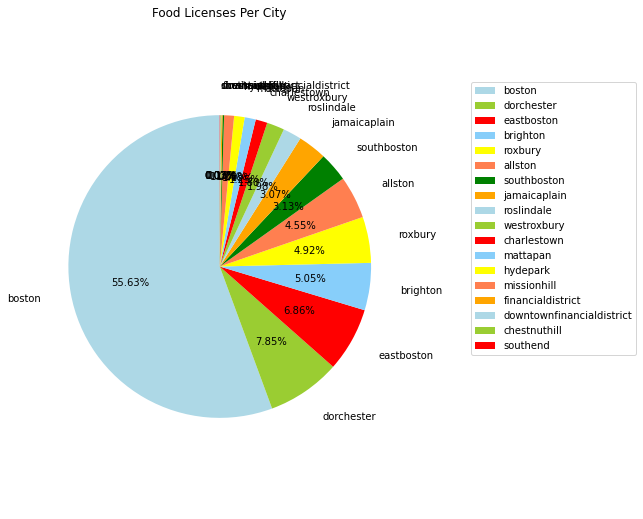

In [116]:
labels=['boston', 'dorchester', 'eastboston', 'brighton', 'roxbury', 'allston', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', '', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill', 'southend']
sizes=[1686, 238, 208, 153, 149, 138, 95, 93, 60, 57, 38, 36, 34, 32, 5, 4, 2, 2, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"] 
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Food Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

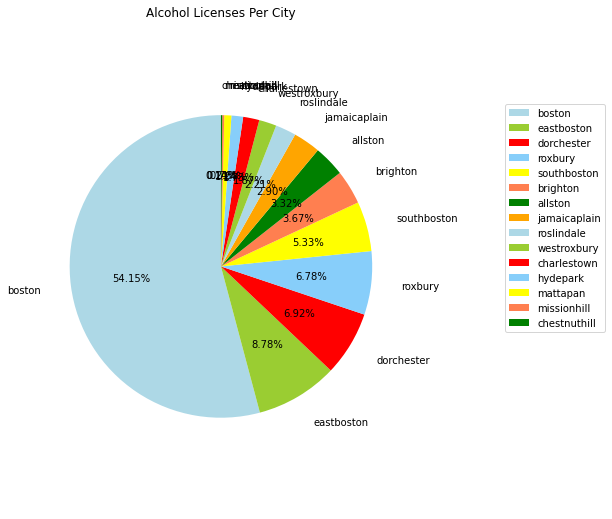

In [117]:
labels=['boston', 'eastboston', 'dorchester', 'roxbury', 'southboston', 'brighton', 'allston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'hydepark', 'mattapan', 'missionhill', 'chestnuthill']
sizes=[783, 127, 100, 98, 77, 53, 48, 42, 32, 27, 25, 18, 11, 3, 2]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Alcohol Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

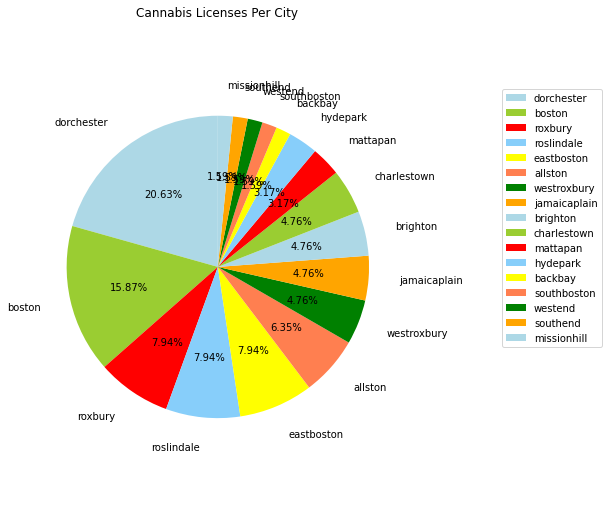

In [118]:
labels=['dorchester', 'boston', 'roxbury', 'roslindale', 'eastboston', 'allston', 'westroxbury', 'jamaicaplain', 'brighton', 'charlestown', 'mattapan', 'hydepark', 'backbay', 'southboston', 'westend', 'southend', 'missionhill']
sizes=[13, 10, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Cannabis Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()

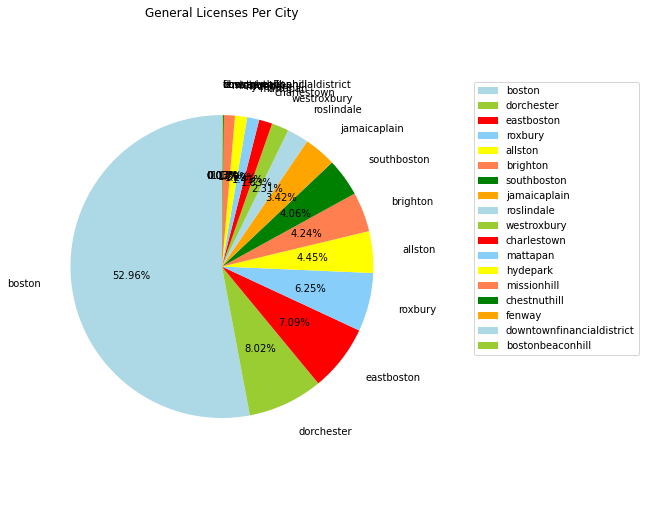

In [119]:
labels=['boston', 'dorchester', 'eastboston', 'roxbury', 'allston', 'brighton', 'southboston', 'jamaicaplain', 'roslindale', 'westroxbury', 'charlestown', 'mattapan', 'hydepark', 'missionhill', 'chestnuthill', 'fenway', 'downtownfinancialdistrict', 'bostonbeaconhill']
sizes=[1763, 267, 236, 208, 148, 141, 135, 114, 77, 61, 47, 43, 43, 39, 4, 1, 1, 1]
plt.figure(figsize=(6,9)) 
colors = ['lightblue','yellowgreen','red','lightskyblue','yellow',"coral","green","orange"]
patches,text1, text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90,
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("General Licenses Per City")
plt.legend(loc='center', bbox_to_anchor=(1.5, 0.6),ncol=1)
plt.show()